# Introduction

The dataset includes 3 iris species with 50 samples each as well as some properties about each flower.

The columns in this dataset are:
- id
- sepal length (cm)
- sepal width (cm)
- petal width (cm)
- petal width (cm)
- species

So our main objective is to build a Machine Learning Model which will predict whether the attributes given clearly cassify the species.

This is a **Multi-class classification problem**. Hence, our aim is to compare between kNN, Decision Tree and Naive Bayes algorithm on the iris dataset and choosing the best ML model.



# Importing Necessary Libraries

The iris dataset is taken from the scikit-learn website.

The website link will be shown below:

https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html


In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
# For the Iris dataset
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Model Select & Cross-validation
from sklearn.model_selection import KFold, train_test_split, cross_val_score

# Classifier algorithms
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB

# Only two libraries will be used from scikit-learn library while kNN will be hard coded.

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()

# Dataframe for Iris
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable (species) to the DataFrame
iris_df['species'] = iris.target_names[iris.target]

# Print the first 5 of the dataframe
print(iris_df.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


- **Sepal length** : Length of the outermost part of the flower
- **Sepal width** : Width of the outermost part of the flower
- **Petal length** : Length of the colorful part of the flower
- **Petal width** : Width of the colourful part of the flower

# Initial Data Analysis

Preliminary analysis to understand the structure and types of data columns:

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Machine Learning Terminology

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_df.shape

(150, 5)

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exploratory Data Analysis (EDA)

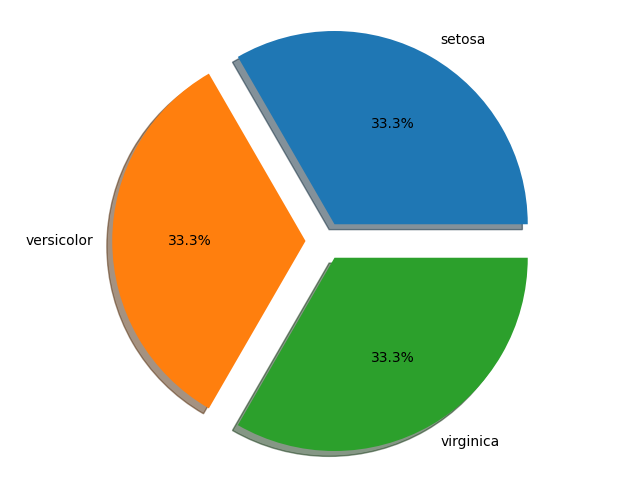

In [ ]:
#pie plot
# Your existing pie plot code
iris_df['species'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct='%1.1f%%', shadow=True, figsize=(8, 6))

# Additional code to remove the label and set the aspect ratio to be equal (for a circular pie)
plt.axis('equal')
plt.ylabel('')  # Remove the ylabel
plt.show()

array([[<Axes: title={'center': 'petal length (cm)'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal width (cm)'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal length (cm)'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal width (cm)'}, xlabel='[species]'>]],
      dtype=object)

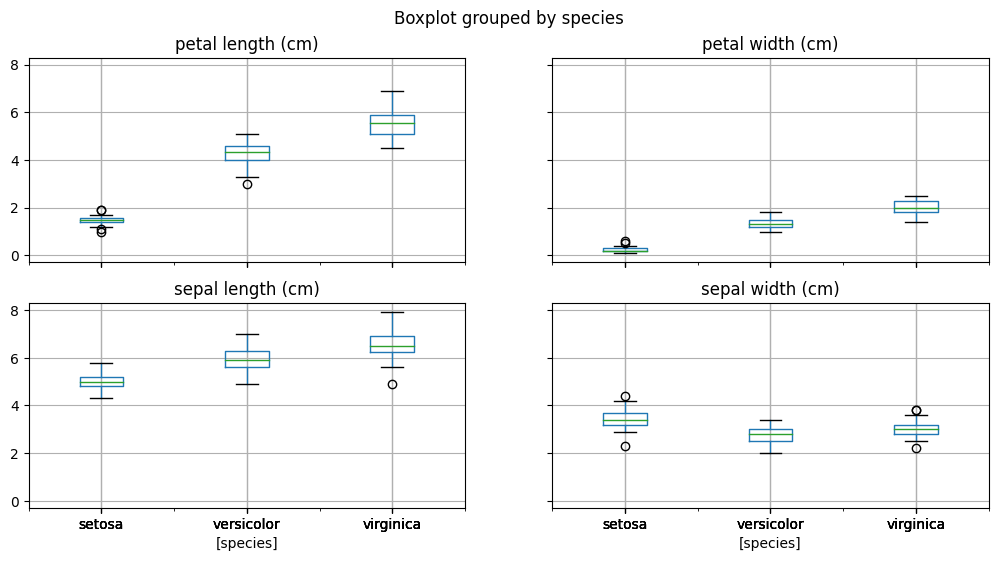

In [ ]:
# Boxplot on each feature split out by species
iris_df.boxplot(by="species", figsize=(12, 6))

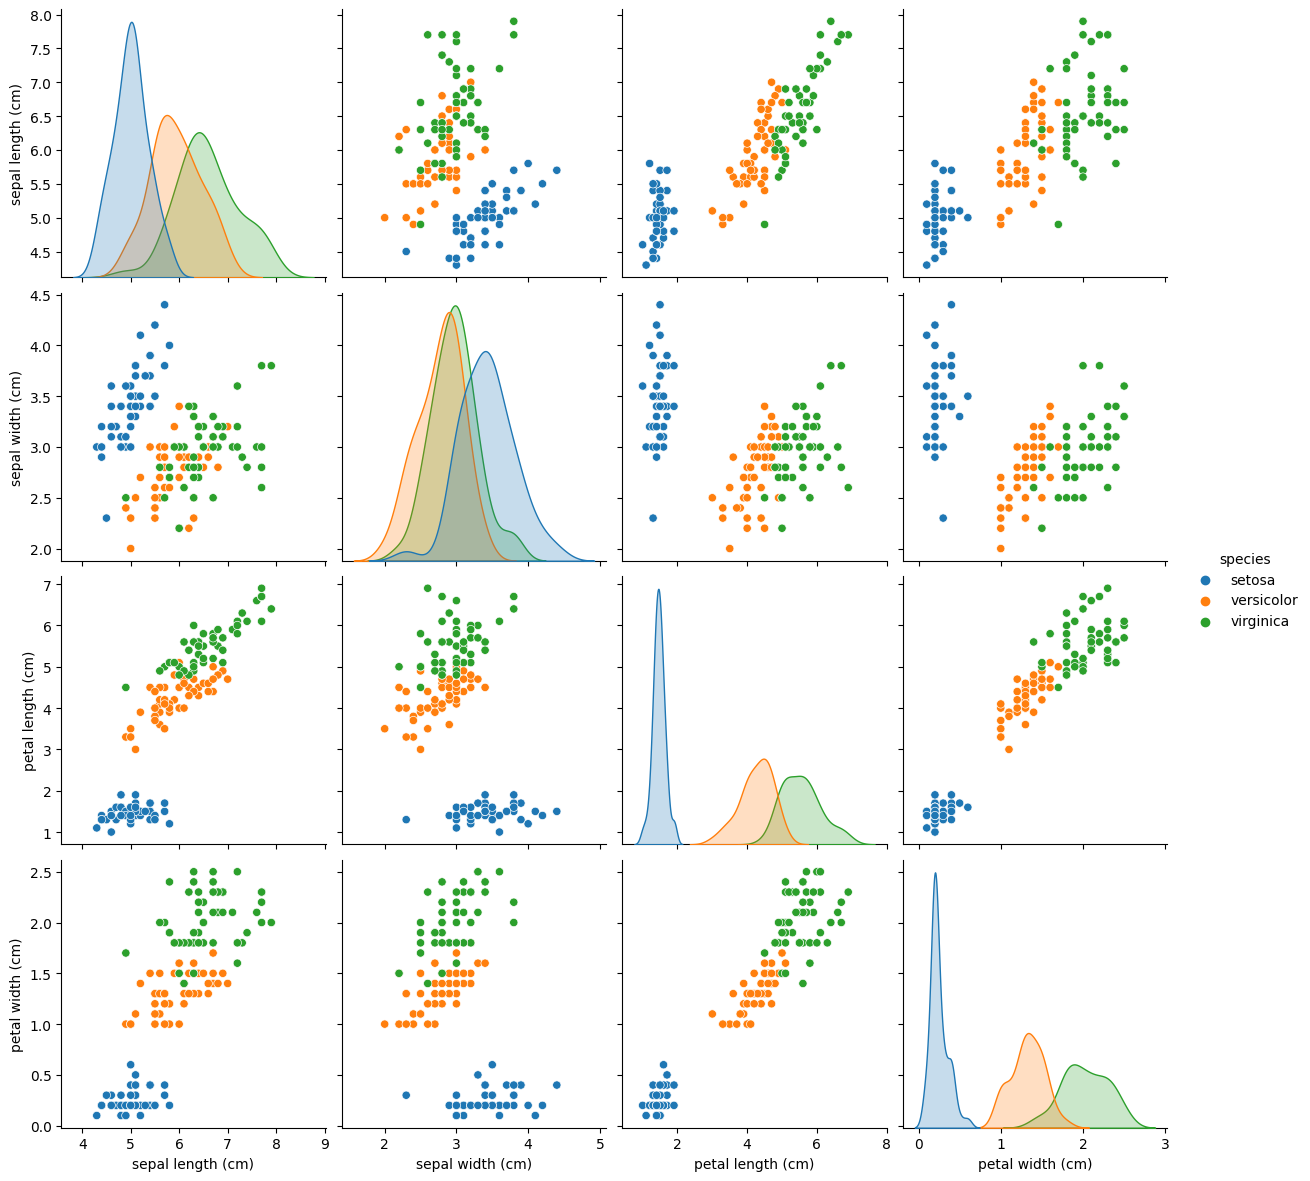

In [ ]:
sns.pairplot(iris_df, hue="species", height=3)

<Axes: xlabel='species', ylabel='sepal width (cm)'>

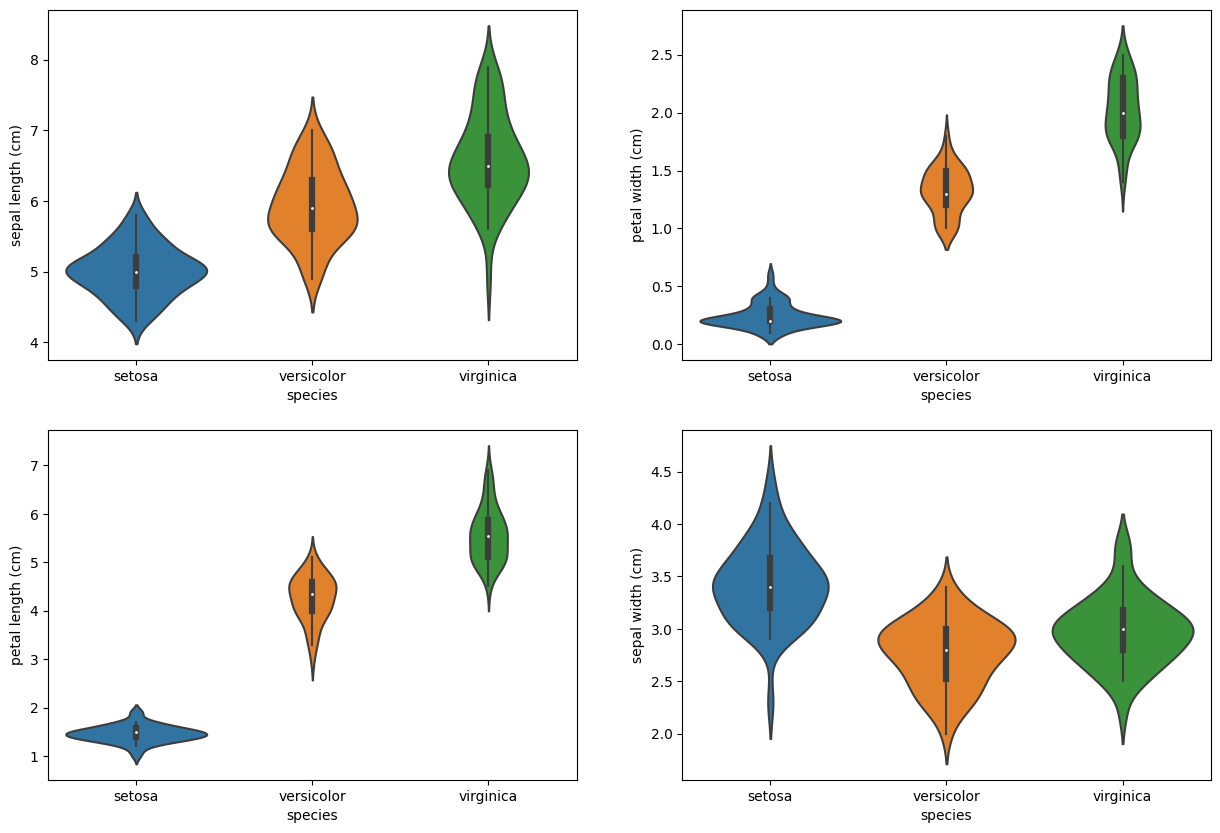

In [ ]:
#VIOLIN PLOT
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal length (cm)',data=iris_df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal width (cm)',data=iris_df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal length (cm)',data=iris_df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal width (cm)',data=iris_df)

# Correlation

The number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the features will reduce the accuracy. Thus features selection should be done carefully.

In [ ]:
numeric_df = iris_df.select_dtypes(include=['number']) # Select number columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


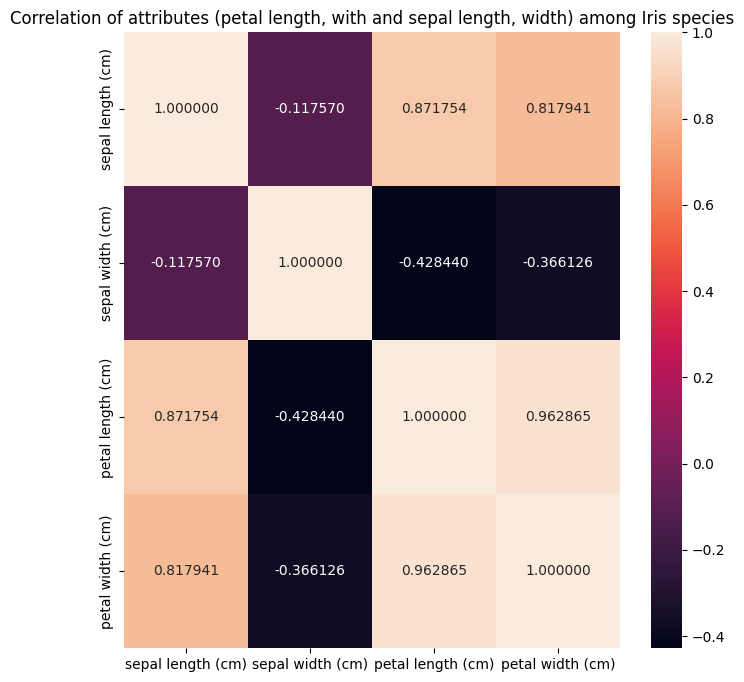

In [ ]:
plt.subplots(figsize = (8,8))
sns.heatmap(correlation_matrix, annot=True, fmt='f').set_title('Correlation of attributes (petal length, with and sepal length, width) among Iris species')
plt.show()

#### Observation:
- The sepal width and length are not correlated.
- The petal width and length are high correlated.

Hence, we will use all the features for training the algorithm and check the accuracy.


# Feature selection

As we can see dataset contain 5 columns: sepal length, sepal width, petal length, petal width and species. The actual features are described by columns 1 to 4. Last colum contains labels of samples. Firstly we need to split into two arrays: X (features) and y (labels).

In [ ]:
X = iris_df[iris.feature_names].values
y = iris.target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- Iris-setosa correspond to 0
- Iris-versicolor correspond to 1
- Iris-virginica correspond to 2

# Splitting the data into Training and Testing dataset

In [ ]:
# Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other.

We have used a test_size of 0.4. Reasons will be stated in the report.

# Feature Scaling

It is used to transform the values of features and variables in the Iris dataset to a similar scale.

In [ ]:
# Instantiate a StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

# Building Machine Learning Models

### **Decision Tree**

In [ ]:
# Assuming you have X_train and y_train
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

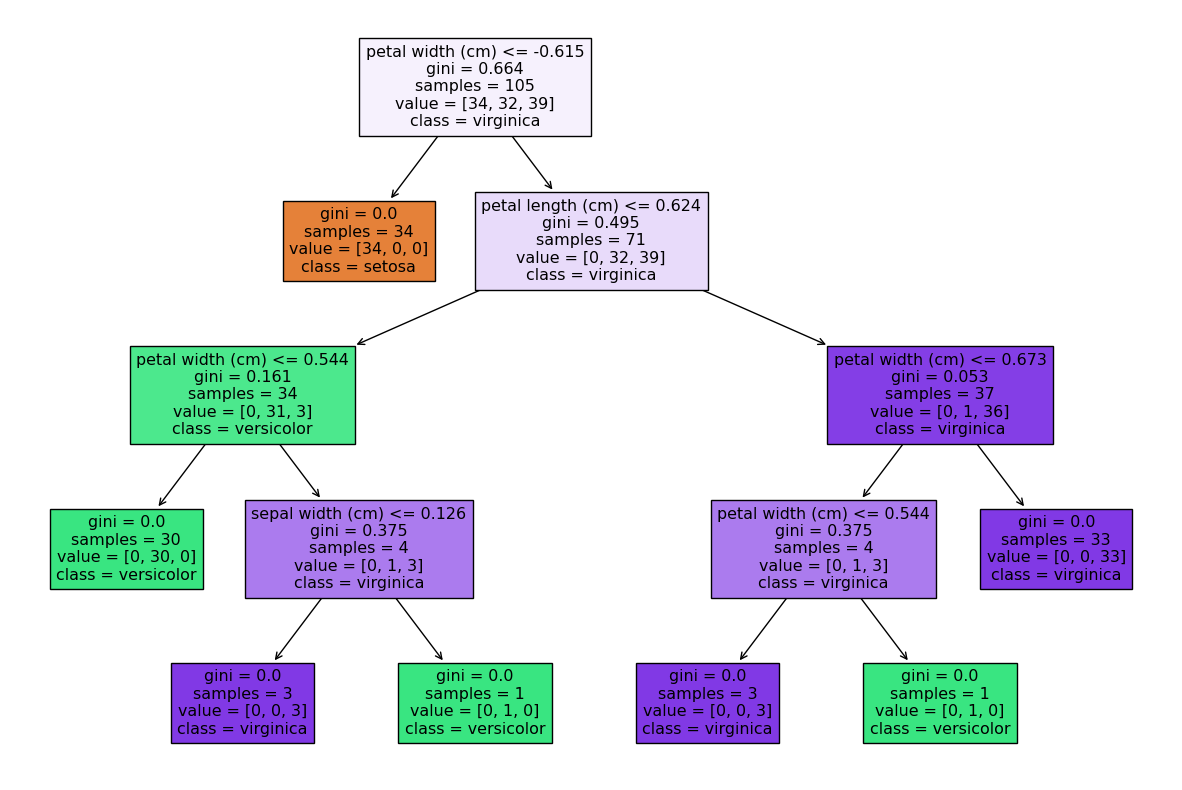

In [ ]:
# Plot the decision tree
# Assuming X_train is a NumPy array
X_train_df = pd.DataFrame(X_train, columns=iris.feature_names)

# Now you can use X_train_df in the plot_tree function
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, filled=True, feature_names=X_train_df.columns, class_names=iris.target_names)
plt.show()



Let's analyze the first node.


```
X[3] <= -0.615
gini = 0.664
samples = 105
value = [34, 32, 39]
```

What is this telling us? Several things:
- X[3] <= -0.615 : Our model seems to have decided that the first feature it wants to make a decision on is number 4 (python lists start at index 0). This feature is petal width (cm). It also chose -0.6156 as the dividing value.

- gini : The impurity of the node

- samples : The amount of training samples that went through this node. In this case all of them since it's the frist node.

By looking at the left child node of this first node we find a leaf. The sample have reached a leaf node so it is already classified. In our case, we can see 34 training values landed on this end node and we're all classified as type 1 (setosa).

The right child on the other hand makes another split and continues the tree, making more decisions down the road until classifying the samples.



In [ ]:
# Predicting the Test set result
y_pred = decision_tree.predict(X_test)
accuracy_dt=round(accuracy_score(y_test,y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)


# Calculate metrics for the Decision Tree
accuracy_dt = round(accuracy_score(y_test, y_pred) * 100, 2)
precision_dt = precision_score(y_test, y_pred, average='micro')
recall_dt = recall_score(y_test, y_pred, average='micro')
f1_dt = f1_score(y_test, y_pred, average='micro')

# Accuracy score
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')

# the confusion matrix tells us how many samples of each type were correctly classified.
# print('Confusion matrix for DecisionTree\n',cm)
# print('\n')
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

accuracy_DecisionTree: 0.978
precision_DecisionTree: 0.978
recall_DecisionTree: 0.978
f1-score_DecisionTree : 0.978


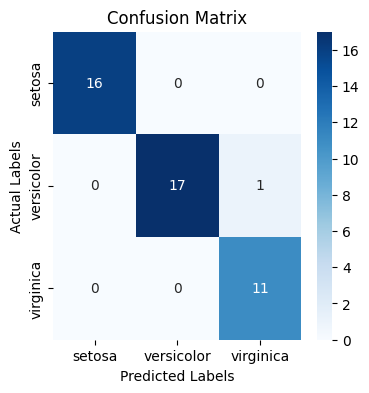

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

There are 3 different classifications that the data can be placed into. This confusio matrix is telling us that the model predicted:

- Setosa (type 1) => Samples: 16, Correctly classified: 16
- Versicolor (type 2) => Samples: 17, Correctly classified: 17. 1 sample was incorrectly classified as type 3.
- Virginica (type 3) => Samples: 11, Correctly classified: 11.

Which means that the model was only wrong once in 44 samples. However, the left side of the decision tree hows 34, which means for that specific node, the algorithm used 34 samples to make a decision. Moreover, these 34 samples may not be the same as the entire dataset, and the missing 10 samples might have gone to other branches in the tree.

#### Feature Importance

In a decision tree-based model, you can calculate feature importances to understand the contribution of each feature (variable) to the model's predictions. Feature importances are useful for feature selection, identifying important predictors, and gaining insights into the underlying relationships in the data.

1. Gini Importance (for classification):
- Gini importance, also known as Gini impurity or mean decrease impurity, is a method for measuring the imporatnce of features in classification tasks.
- It is calculated based on how much a feature contributes to the reduction in Gini impurity at each split in the decision tree.
- The formula for Gini importance for a particular feature is as follows:

Gini Importance = Sum over all nodes (Proportion of samples in the node * Gini impurity reduction due to the feature)

- Features that result in larger reductions in Gini impurity across all nodes are considered more important.


2. Information Gain (Entropy) (for Classification):

- Information gain, based on entropy, is another method used for calculating feature importances in classification tasks.
- It measures the reduction in entropy (uncertainty) of the target variable when a feature is used for splitting.
- Features that reduce entropy more effectively are considered more important.


In [ ]:
# Example feature names (replace this with your actual feature names)
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display the results
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by the "Importance" column in ascending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)


# Display the DataFrame
print(feature_importances_df)


             Feature  Importance
3   petal width (cm)    0.580826
2  petal length (cm)    0.397670
1   sepal width (cm)    0.021505
0  sepal length (cm)    0.000000


From the feature importance, here is what we can interpret:

- Petal width (most important)
- Petal length (important)
- Sepal width (less significant)
- Sepal length (least signifiant)

### **Naive Bayes**

In [ ]:
# Fitting classifier to the Training set
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predicting the Test set results
Y_pred = gaussian_nb.predict(X_test)

# Accuracy score
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian_nb.score(X_train, y_train) * 100, 2)

accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')

print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


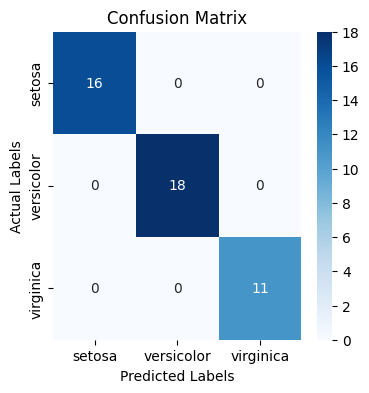

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


- Setosa (type 1) => Samples: 16, Correctly classified: 16
- Versicolor (type 2) => Samples: 18, Correctly classified: 18.
- Virginica (type 3) => Samples: 11, Correctly classified: 11.

### **Custom K-Nearest Neighbor**

In [ ]:
# Deifning the class for the kNN algorithm
class ThisKNN:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = np.zeros(X_test.shape[0])

        for i in range(X_test.shape[0]):
            distances = np.sqrt(np.sum((self.X_train - X_test[i])**2, axis=1))
            indices = np.argsort(distances)[:self.n_neighbors]
            nearest_labels = self.y_train[indices]
            y_pred[i] = np.bincount(nearest_labels).argmax()

        return y_pred.astype(int)

In [ ]:
# Instantiate your own KNN classifier
my_knn = ThisKNN(n_neighbors=5)

# Train the model
my_knn.fit(X_train, y_train)

# Make predictions
Y_pred = my_knn.predict(X_test)

In [ ]:
# Implement your own metric calculation functions
def calculate_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

def calculate_precision(y_true, y_pred, label=1):
    true_positives = np.sum((y_true == label) & (y_pred == label))
    predicted_positives = np.sum(y_pred == label)
    return true_positives / predicted_positives if predicted_positives > 0 else 0

def calculate_recall(y_true, y_pred, label=1):
    true_positives = np.sum((y_true == label) & (y_pred == label))
    actual_positives = np.sum(y_true == label)
    return true_positives / actual_positives if actual_positives > 0 else 0

def calculate_f1_score(y_true, y_pred, label=1):
    precision = calculate_precision(y_true, y_pred, label)
    recall = calculate_recall(y_true, y_pred, label)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0


In [ ]:
# Rounding the number to percentage
accuracy_knn = round(calculate_accuracy(y_test, Y_pred) * 100, 2)

# Calculate metrics using your own functions
accuracy = calculate_accuracy(y_test, Y_pred)
precision = calculate_precision(y_test, Y_pred)
recall = calculate_recall(y_test, Y_pred)
f1 = calculate_f1_score(y_test, Y_pred)

# Print the results
print('accuracy_KNN : %.3f' % accuracy)
print('precision_KNN : %.3f' % precision)
print('recall_KNN: %.3f' % recall)
print('f1-score_KNN : %.3f' % f1)

accuracy_KNN : 0.978
precision_KNN : 1.000
recall_KNN: 0.944
f1-score_KNN : 0.971


# Result

In [ ]:
# Add the results to the DataFrame
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 'Decision Tree'],
    'Score': [accuracy_knn, acc_gaussian, acc_decision_tree],
    "Accuracy_score": [accuracy_knn, accuracy_nb, accuracy_dt],
    'Precision': [precision, precision, precision_dt],
    'Recall': [recall, recall, recall_dt],
    'F1-Score': [f1, f1, f1_dt]
})

result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Score,Accuracy_score,Precision,Recall,F1-Score
0,Naive Bayes,94.29,100.00,1.000000,0.944444,0.971429
1,KNN,97.78,97.78,1.000000,0.944444,0.971429
2,Decision Tree,100.00,97.78,0.977778,0.977778,0.977778


# Evaluating the Model

To use cross_val_score with the custom ThisKNN class and other models, we need to wrap them using scikit-learn's BaseEstimator and ClassifierMixin classes. This involves creating a wrapper class for the custom model that implements fit, predict, and get_params methods.

Here's an example of how you can create a wrapper class for the ThisKNN:

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MyKNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.my_knn = ThisKNN(n_neighbors=n_neighbors)

    def fit(self, X, y):
        self.my_knn.fit(X, y)
        return self

    def predict(self, X):
        return self.my_knn.predict(X)

    def get_params(self, deep=True):
        return {'n_neighbors': self.n_neighbors}

In [ ]:
# List of models
models = [MyKNNWrapper(n_neighbors=5), GaussianNB(), DecisionTreeClassifier()]

# Initialize lists to store cross-validation results
cv_accuracy = []
cv_precision = []
cv_recall = []
cv_f1 = []

# K-fold cross validation is applied here
# Perform 5-fold cross-validation for each model
for model in models:
    # Accuracy
    cv_accuracy_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_accuracy.append(np.mean(cv_accuracy_scores))

    # Precision
    cv_precision_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='precision_macro')
    cv_precision.append(np.mean(cv_precision_scores))

    # Recall
    cv_recall_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall_macro')
    cv_recall.append(np.mean(cv_recall_scores))

    # F1-Score
    cv_f1_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    cv_f1.append(np.mean(cv_f1_scores))

# Add the cross-validation results to the DataFrame
cv_results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 'Decision Tree'],
    'CV_Accuracy': cv_accuracy,
    'CV_Precision': cv_precision,
    'CV_Recall': cv_recall,
    'CV_F1-Score': cv_f1
})

# Merge the cross-validation results with the original results DataFrame
results = pd.merge(results, cv_results, on='Model')

# Display the merged DataFrame
print(results)

           Model   Score  Accuracy_score  Precision    Recall  F1-Score  \
0            KNN   97.78           97.78   1.000000  0.944444  0.971429   
1    Naive Bayes   94.29          100.00   1.000000  0.944444  0.971429   
2  Decision Tree  100.00           97.78   0.977778  0.977778  0.977778   

   CV_Accuracy  CV_Precision  CV_Recall  CV_F1-Score  
0     0.952381      0.959259   0.954365     0.954304  
1     0.942857      0.956852   0.943254     0.943314  
2     0.952381      0.958333   0.952778     0.952716  


In [ ]:
# Using the average F1-score to determine the best model

average_f1_scores = cv_results.groupby('Model')['CV_F1-Score'].mean().reset_index()
best_model = average_f1_scores.loc[average_f1_scores['CV_F1-Score'].idxmax()]

print("Best Model based on Average F1-Score:")
print(best_model)


Best Model based on Average F1-Score:
Model               KNN
CV_F1-Score    0.954304
Name: 1, dtype: object


-- End --